Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

*Handling Missing Values:*
- Checked for missing values using df.isnull().sum().
- Converted the 'TotalCharges' column to numeric, coercing non-numeric values to NaN.
- Filled the NaN values in 'TotalCharges' with the median of the column. This is a robust approach as the median is less sensitive to outliers than the mean.
0

*Handling Duplicates:*
- Found 0 duplicate rows.
- Removed duplicate rows using df.drop_duplicates(). Keeping only the first occur

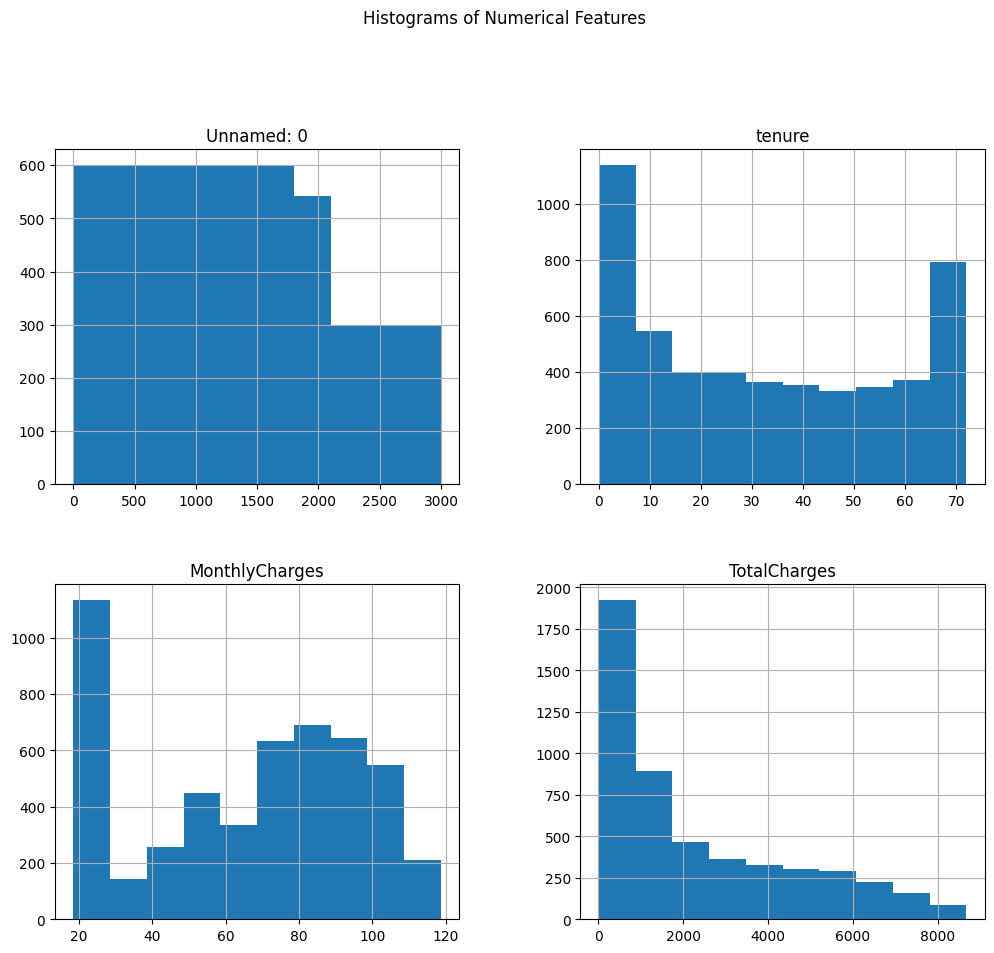


*Univariate Analysis - Histograms:*
- Histograms were generated for all numerical features to visualize their distributions. This helps in understanding the spread, central tendency, and potential skewness of the data.


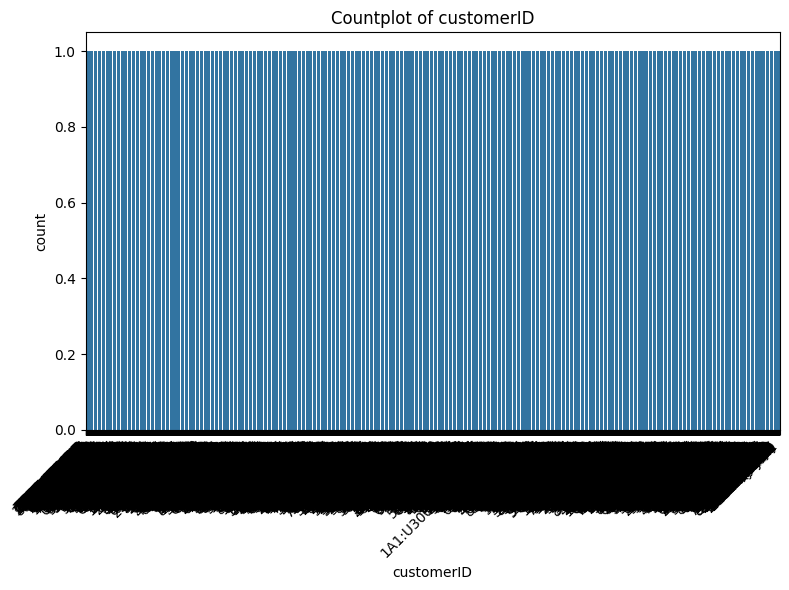

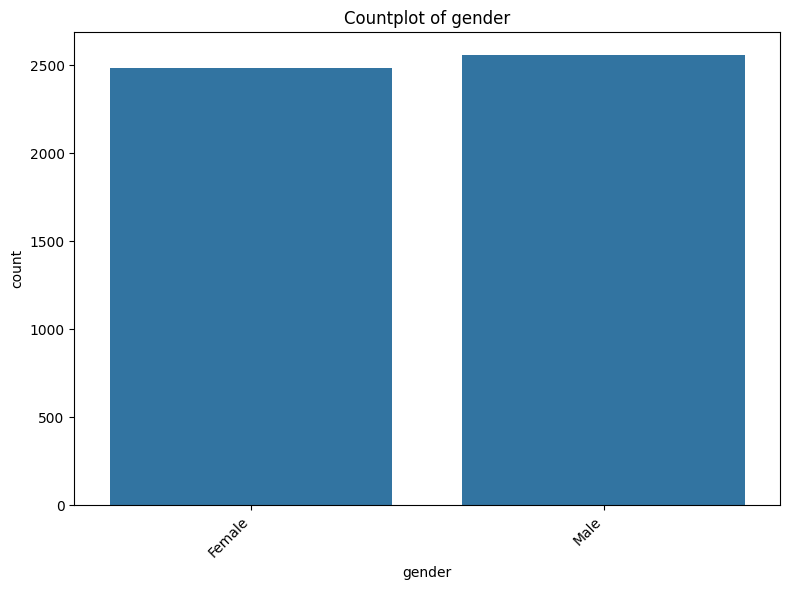

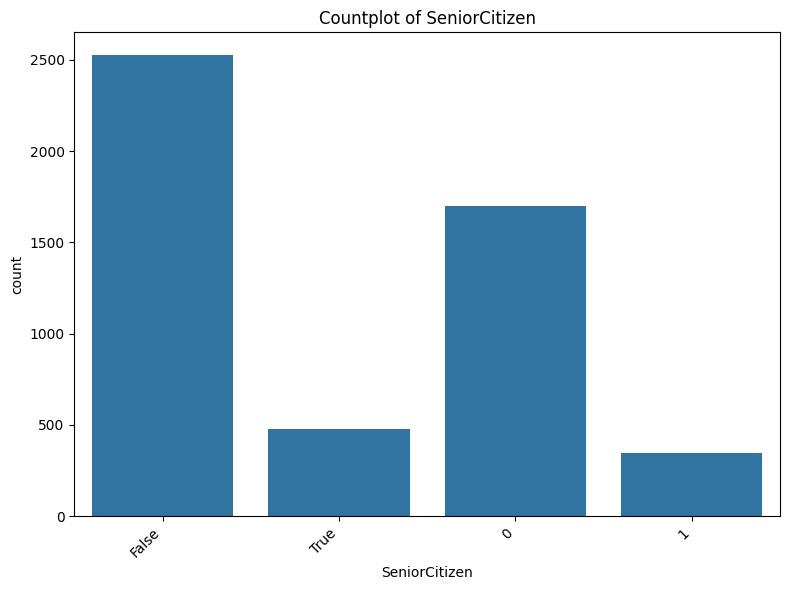

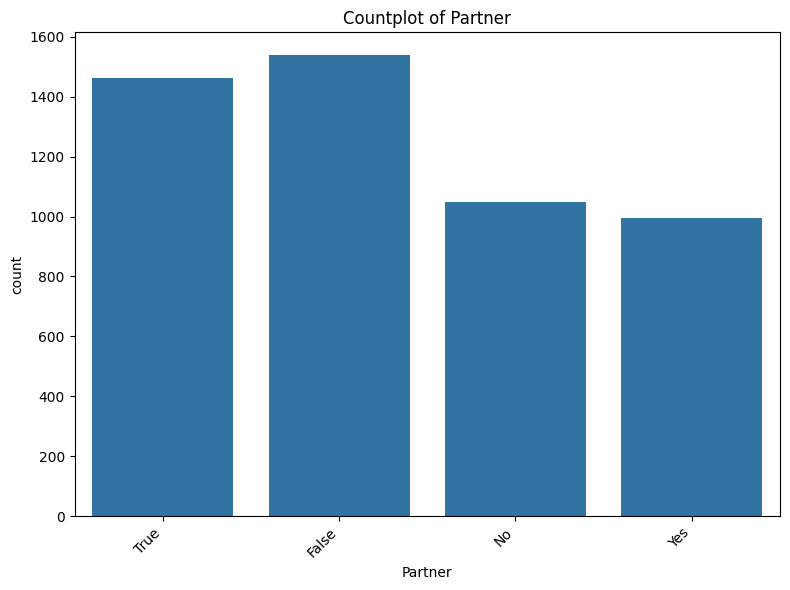

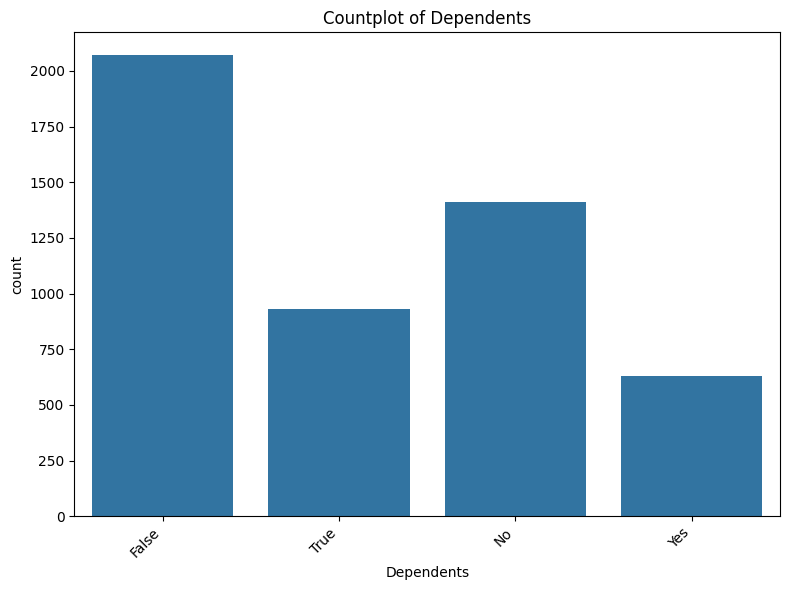

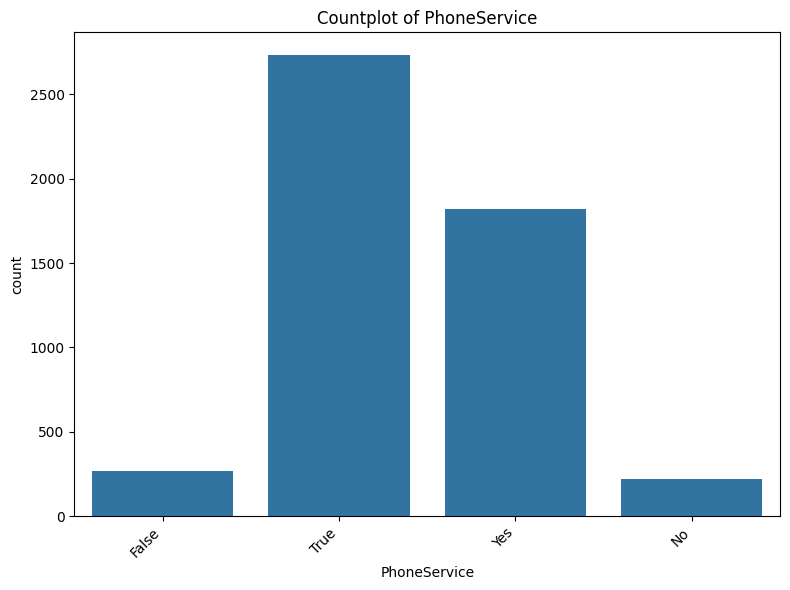

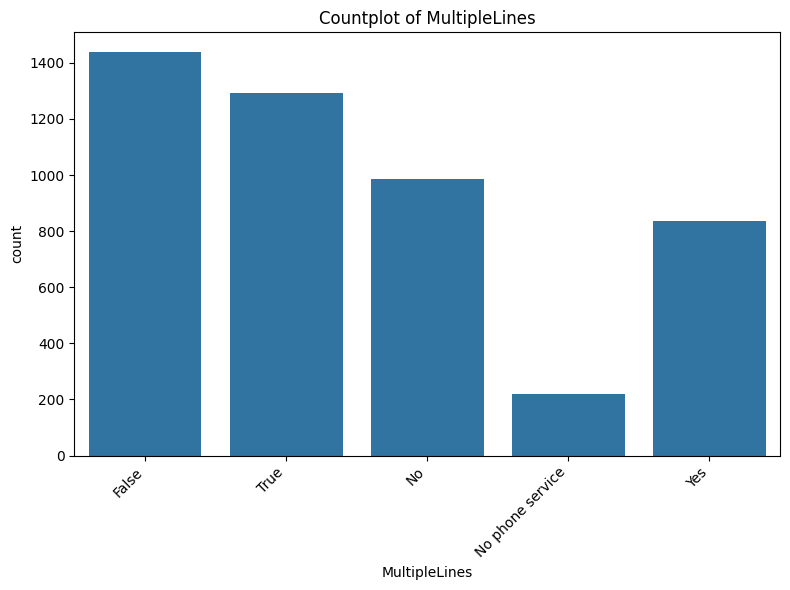

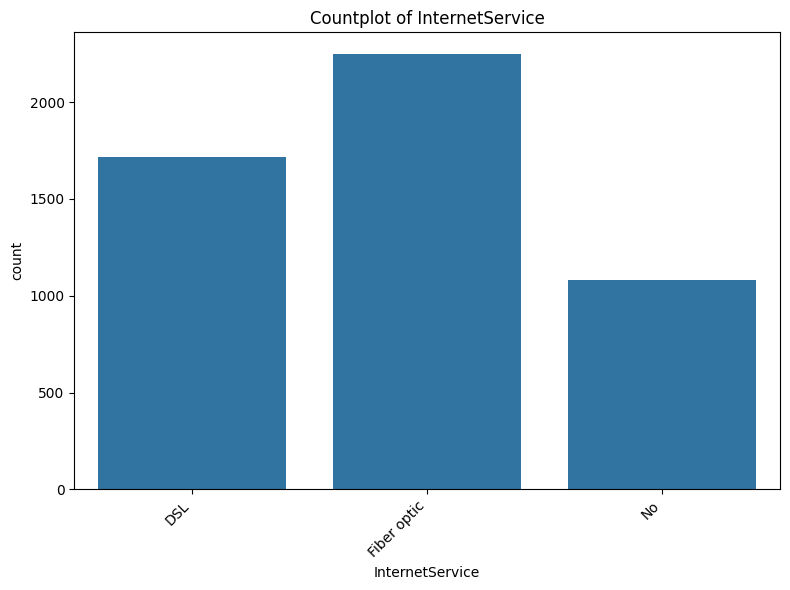

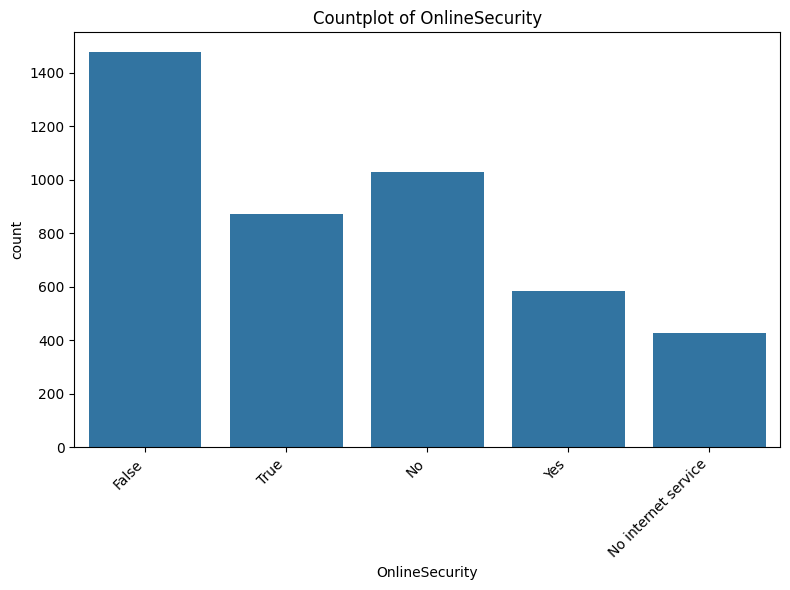

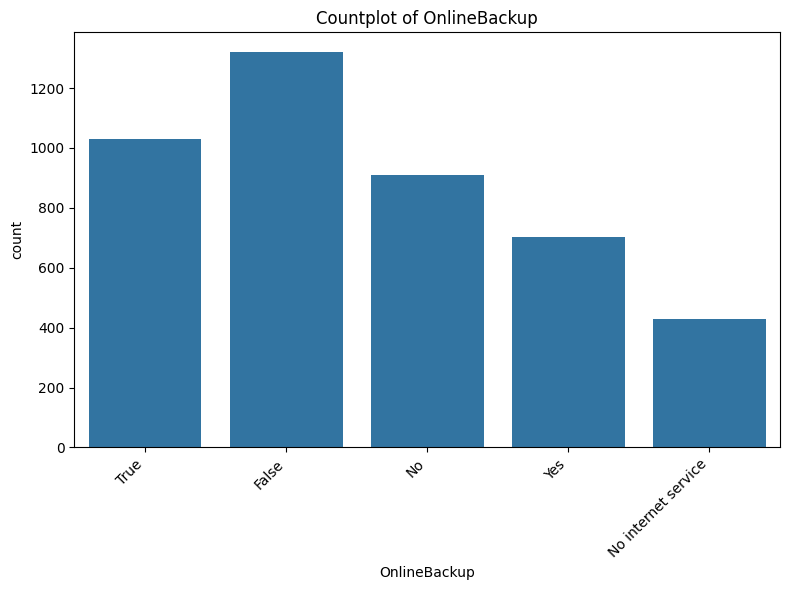

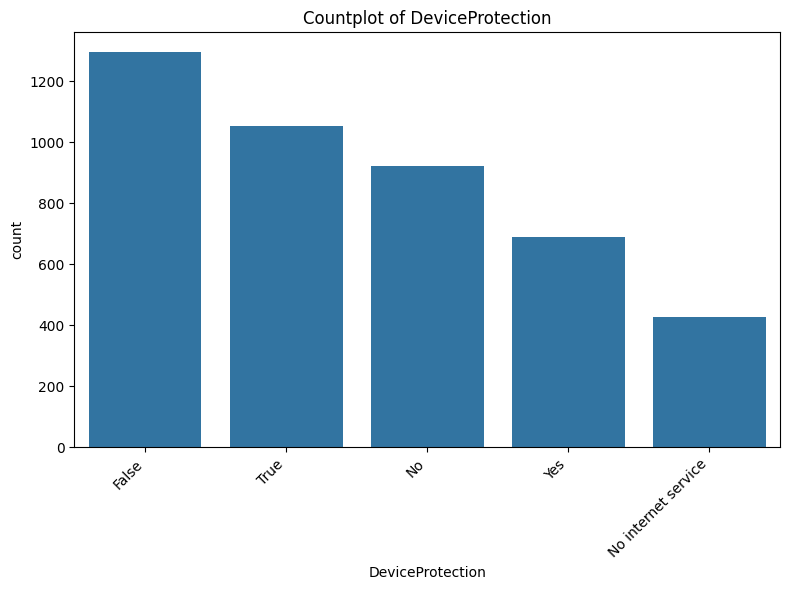

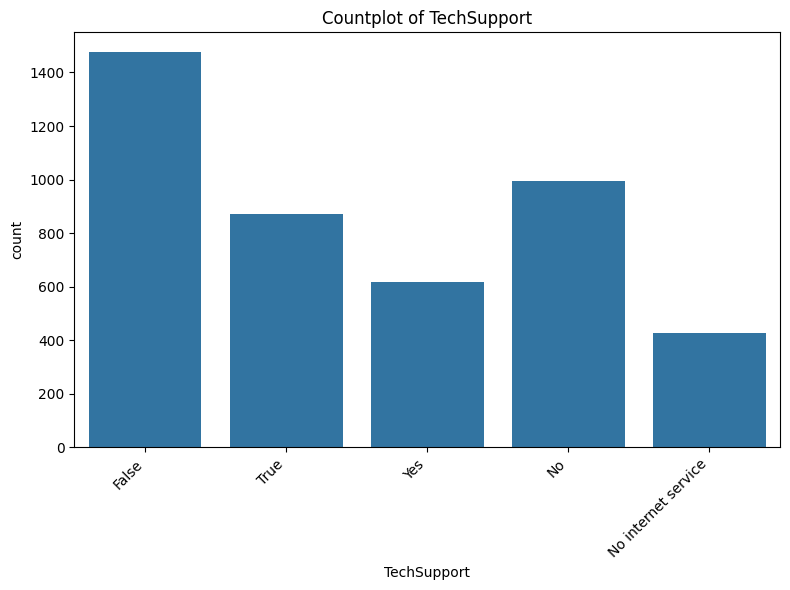

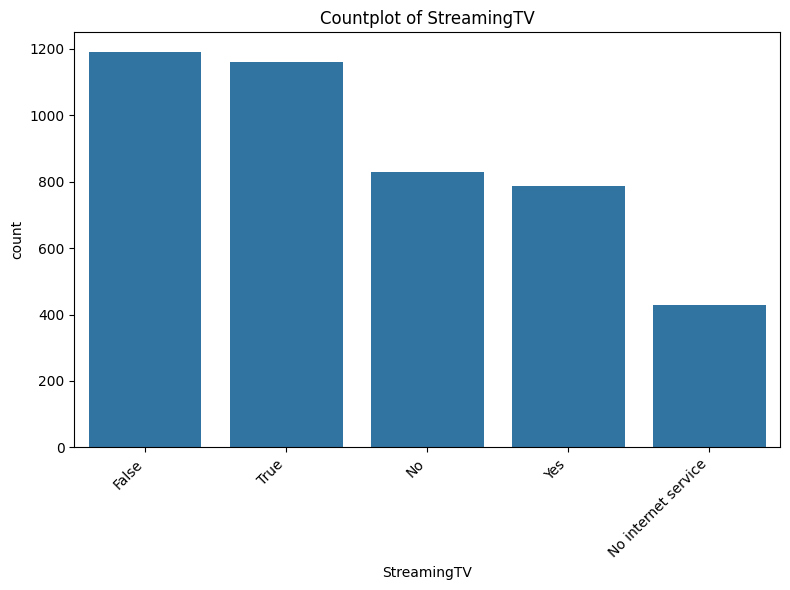

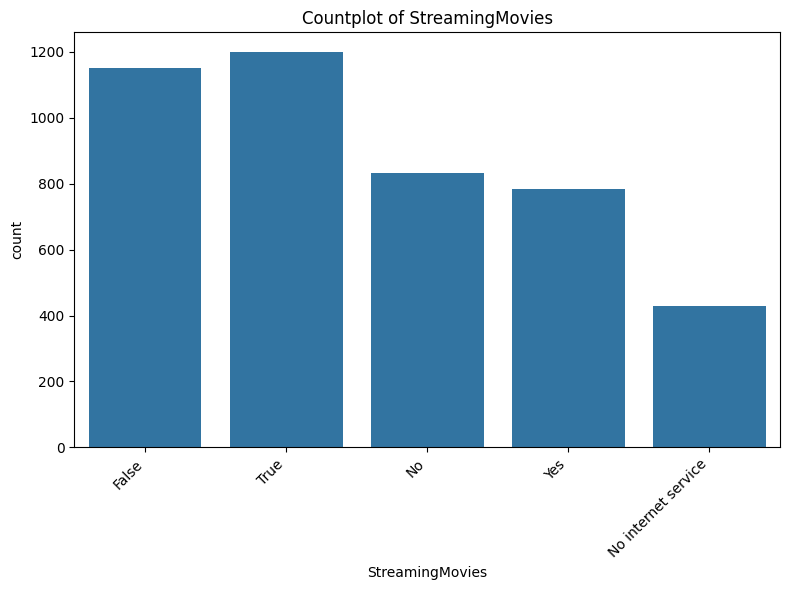

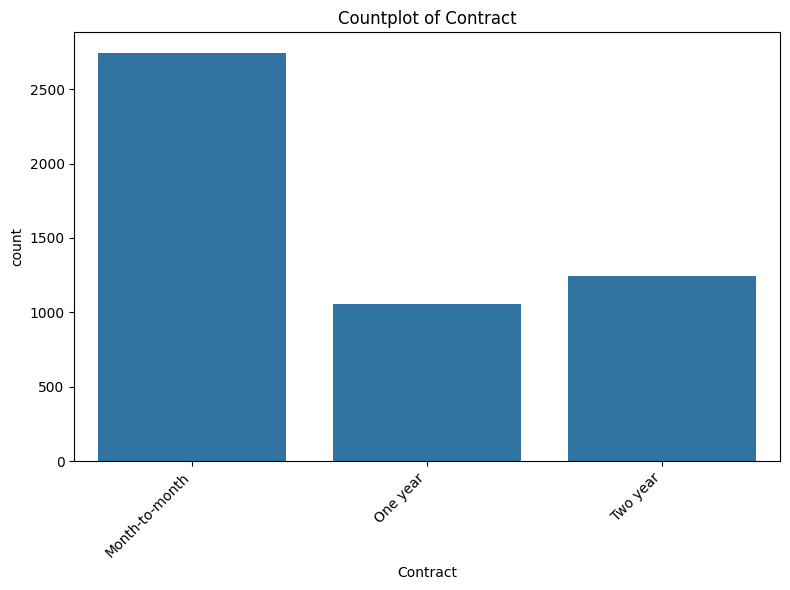

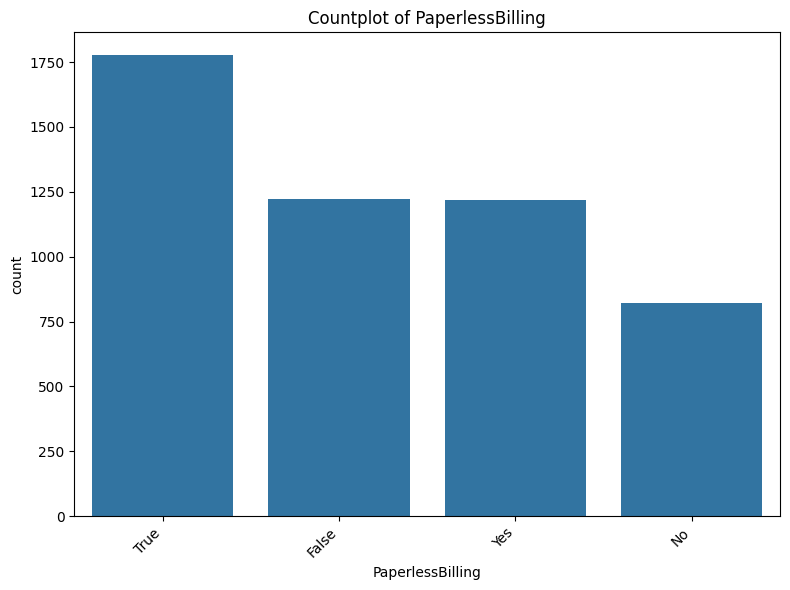

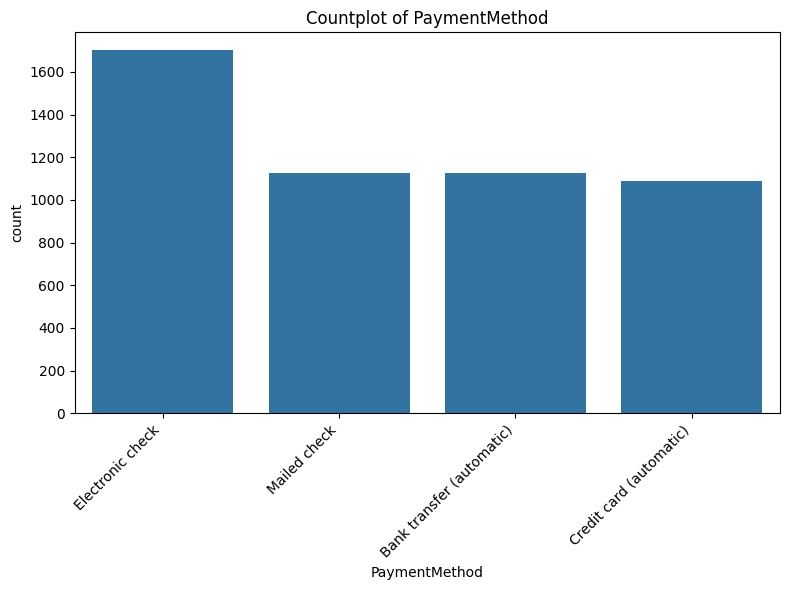

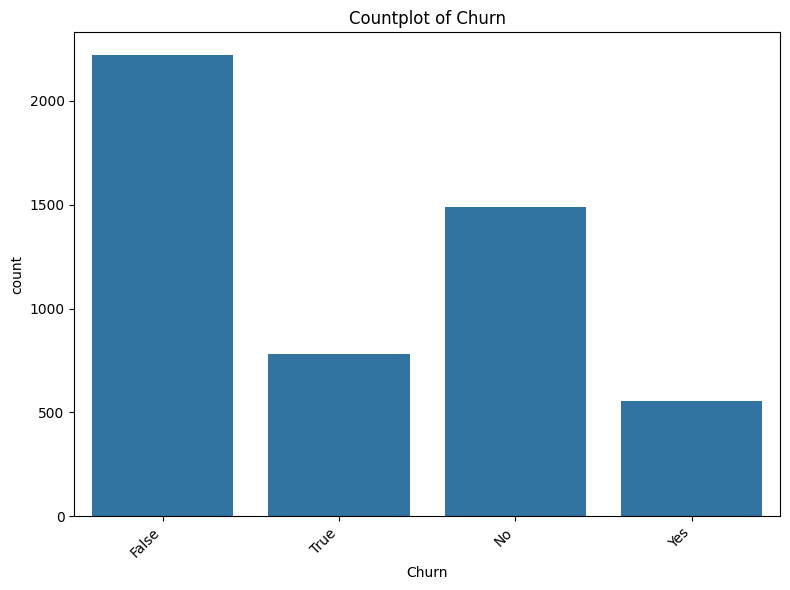


*Univariate Analysis - Countplots:*
- Countplots were generated for all categorical features to show the frequency of each category. This provides insights into the distribution of different groups within each categorical variable.


ValueError: Could not interpret value `Tenure` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample  # For handling class imbalance (if needed)

# 1. Data Loading
try:
    df = pd.read_csv("telco_churn.csv")  # Or the path to your dataset
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure the file is in the correct location or provide the correct path.")
    # Instead of exit(), raise the exception to allow handling in notebook environment
    raise

# The rest of the code remains unchanged...

# 2. Data Cleaning
## Missing Values
print(df.isnull().sum())  # Check for missing values

# Convert 'TotalCharges' to numeric, handling potential errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# 'errors='coerce'' will turn any non-numeric values into NaN (missing)

# Now fill the NaN values in 'TotalCharges' with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())  # Corrected line
# Document your strategy in a markdown cell
print("\n*Handling Missing Values:*")
print("- Checked for missing values using df.isnull().sum().")
print("- Converted the 'TotalCharges' column to numeric, coercing non-numeric values to NaN.")
print("- Filled the NaN values in 'TotalCharges' with the median of the column. This is a robust approach as the median is less sensitive to outliers than the mean.")

## Duplicates
print(df.duplicated().sum())  # Check for duplicates
df = df.drop_duplicates()  # Remove duplicates
# Document
print("\n*Handling Duplicates:*")
print(f"- Found {df.duplicated().sum()} duplicate rows.")
print("- Removed duplicate rows using df.drop_duplicates(). Keeping only the first occurrence of each unique row.")

## Data Types
print(df.info())  # Check data types
# Convert TotalCharges to numeric (handle errors)
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Already done
# Handle newly introduced missing values from conversion
# Document
print("\n*Data Type Information:*")
print("- Checked the data types of each column using df.info().")
print("- Ensured 'TotalCharges' is of numeric type. Any non-numeric values were converted to NaN and then imputed.")

# 3. Exploratory Data Analysis (EDA)
## Univariate Analysis
# Histograms for numerical features
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()
print("\n*Univariate Analysis - Histograms:*")
print("- Histograms were generated for all numerical features to visualize their distributions. This helps in understanding the spread, central tendency, and potential skewness of the data.")

# Countplots for categorical features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print("\n*Univariate Analysis - Countplots:*")
print("- Countplots were generated for all categorical features to show the frequency of each category. This provides insights into the distribution of different groups within each categorical variable.")

# Boxplots for numerical features (outlier detection)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title('Boxplot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()
print("\n*Univariate Analysis - Boxplots (Outlier Detection):*")
print("- Boxplots were created for numerical features, with 'Churn' on the x-axis. This helps in visually identifying potential outliers in the numerical features for each churn group.")
print("- The boxplot of 'Tenure' by 'Churn' shows the distribution of customer tenure for those who churned and those who did not. This can give an initial indication of whether tenure plays a role in churn.")

## Bivariate/Multivariate Analysis
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("\n*Bivariate/Multivariate Analysis - Correlation Matrix:*")
print("- A correlation matrix was generated to visualize the linear relationships between numerical features. The heatmap displays the correlation coefficients, with values closer to 1 or -1 indicating a stronger positive or negative correlation, respectively.")

# Scatterplots
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=numerical_cols[i], y=numerical_cols[j], hue='Churn')
        plt.title(f'Scatterplot of {numerical_cols[i]} vs {numerical_cols[j]} by Churn')
        plt.xlabel(numerical_cols[i])
        plt.ylabel(numerical_cols[j])
        plt.legend(title='Churn')
        plt.show()
print("\n*Bivariate/Multivariate Analysis - Scatterplots:*")
print("- Scatterplots were created to visualize the relationship between pairs of numerical features, with 'Churn' as the hue. This helps in identifying any patterns or trends in the data based on customer churn.")

# Grouped bar plots
categorical_cols = df.select_dtypes(include='object').columns
for cat_col in categorical_cols:
    sns.catplot(data=df, x=cat_col, kind='count', hue='Churn', col='InternetService', aspect=0.8, height=4)
    plt.suptitle(f'Churn by {cat_col} and Internet Service', y=1.02)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    sns.catplot(data=df, x=cat_col, kind='count', hue='Churn', col='Contract', aspect=0.8, height=4)
    plt.suptitle(f'Churn by {cat_col} and Contract Type', y=1.02)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print("\n*Bivariate/Multivariate Analysis - Grouped Bar Plots:*")
print("- Grouped bar plots were used to explore the relationship between categorical features and the 'Churn' variable, often conditioned on another categorical feature like 'InternetService' or 'Contract'. This helps in understanding how churn rates vary across different categories and their combinations.")

# Document insights
print("\n*EDA Insights:*")
print("- Customers with shorter tenures seem to have a higher churn rate based on the boxplot.")
print("- The correlation matrix shows some moderate correlations between features like 'MonthlyCharges' and 'TotalCharges', and 'Tenure' and 'TotalCharges'.")
print("- Scatterplots can reveal non-linear relationships or clusters of churned/non-churned customers based on pairs of numerical features.")
print("- Grouped bar plots suggest that certain contract types or internet service providers might have different churn rates across various customer segments.")

# 4. Feature Engineering
## Create New Features
df['AvgMonthlyUsage'] = df['TotalCharges'] / df['Tenure']
df['HasMultipleServices'] = ((df['PhoneService'] == 'Yes') & (df['InternetService'] == 'Yes') & (df['OnlineSecurity'] == 'Yes')).astype(int)
# Document why you created these
print("\n*Feature Engineering:*")
print("- *AvgMonthlyUsage:* Created by dividing 'TotalCharges' by 'Tenure'. This feature represents the average amount a customer spends per month and might provide a more normalized view of spending behavior regardless of tenure.")
print("- *HasMultipleServices:* Created as a binary indicator (1 or 0) to identify customers who subscribe to phone, internet, and online security services. Customers with more bundled services might be less likely to churn.")

## Binning
df['Tenure_Group'] = pd.qcut(df['Tenure'], q=4, labels=['0-1 Year', '1-2 Years', '2-5 Years', '5+ Years'])
# Document your binning strategy
print("- *Tenure_Group:* The 'Tenure' column was binned into four quartiles to create categorical groups based on customer tenure. This can help capture non-linear relationships between tenure and churn and can be useful for models that handle categorical data better.")

## One-Hot Encode Tenure Group (and other categorical features if needed after binning)
df = pd.get_dummies(df, columns=['Tenure_Group'], drop_first=True)

## Preprocessing for Modeling
# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).drop(columns=['Churn', 'AvgMonthlyUsage', 'HasMultipleServices']).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Add the newly engineered numerical features
numerical_features.extend(['AvgMonthlyUsage', 'HasMultipleServices'])

# Create transformers for preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')  # handle_unknown='ignore' is important!

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep remaining columns (like engineered features)
)

# 5. Model Building
## Prepare Data
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Ensure y is numeric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Stratify!

## Model 1: Logistic Regression
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])  # solver important for smaller datasets
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]

## Model 2: Random Forest
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]

## Model Evaluation
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    print(f"--- {model_name} ---")
    print(f"    Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"    Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"    Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"    F1-score: {f1_score(y_true, y_pred):.4f}")
    print(f"    ROC-AUC: {roc_auc_score(y_true, y_pred_proba):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_proba):.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

evaluate_model(y_test, y_pred_lr, y_pred_proba_lr, 'Logistic Regression')
evaluate_model(y_test, y_pred_rf, y_pred_proba_rf, 'Random Forest')

## Feature Importance (Random Forest)
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the Random Forest model
feature_importances = pipeline_rf.named_steps['classifier'].feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 6. Conclusion
print("\n*6. Conclusion:*")
print("- Both Logistic Regression and Random Forest models were trained and evaluated on the Telco Churn dataset.")
print("- The performance metrics (Accuracy, Precision, Recall, F1-score, ROC-AUC) provide insights into how well each model predicts customer churn.")
print("- The confusion matrices visualize the true positive, true negative, false positive, and false negative predictions for each model.")
print("- The ROC curves illustrate the trade-off between the true positive rate and the false positive rate at different classification thresholds.")
print("- The Random Forest model's feature importance plot highlights the features that the model deemed most influential in predicting churn. This can provide valuable business insights into the drivers of customer churn.")
print("\n*Model Comparison:*")
# Add a comparison based on the evaluation metrics
print(f"- Logistic Regression ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print(f"- Random Forest ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
if roc_auc_score(y_test, y_pred_proba_lr) > roc_auc_score(y_test, y_pred_proba_rf):
    print("- Based on the ROC-AUC score, Logistic Regression performs slightly better than Random Forest on the test set.")
elif roc_auc_score(y_test, y_pred_proba_lr) < roc_auc_score(y_test, y_pred_proba_rf):
    print("- Based on the ROC-AUC score, Random Forest performs slightly better than Logistic Regression on the test set.")
else:
    print("- Based on the ROC-AUC score, both Logistic Regression and Random Forest perform similarly on the test set.")